# Linear Regression Assignment - Thao_Tran_Chi
##  Bike sharing assignment

#### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

    Which variables are significant in predicting the demand for shared bikes.
    How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

#### Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Step 1: Reading and Understanding the Data

Import NumPy and Pandas and read the biking dataset

In [921]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [922]:
import numpy as np
import pandas as pd

In [923]:
biking = pd.read_csv("day.csv")

In [924]:
# Check the head of the dataset
biking.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Inspect the various aspects of the biking dataframe

In [925]:
biking.shape

(730, 16)

In [926]:
biking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [927]:
# Check missing value
biking.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

No missing value

In [928]:
biking.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### There's some mixes in the columns name. Some is in abbreviation, other in full text. These columns should convert to full text for human friendly based on the dictionary file.

In [929]:
#Renaming the columns
biking.rename(columns = {'yr':'year','mnth':'month','hum':'humidity','cnt':'count'}, inplace = True) 
biking.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### In the dataset that some of the variables, like 'weathersit' and 'season' have values as 1, 2, 3, 4 should be convert to category string values for human friendly

In [930]:
#Mapping variables season, month, weathersit, weekday, holiday, workingday

biking['season']=biking.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
biking['month']=biking.month.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
biking['weathersit']=biking.weathersit.map({1: 'Clear', 2:'Mist + Cloudy', 3:'Light Snow', 4:'Snow + Fog'})
biking['weekday']=biking.weekday.map({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'})
biking['holiday']=biking.holiday.map({0: 'No', 1:'Yes'})
biking['workingday']=biking.workingday.map({0:'No', 1:'Yes'})
biking.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,spring,0,Jan,No,Sat,No,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,No,Sun,No,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,No,Mon,Yes,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,No,Tue,Yes,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,No,Wed,Yes,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Step 2: Visualising the Data

We'll visualise our data using `matplotlib` and `seaborn`.

In [931]:
import matplotlib.pyplot as plt
import seaborn as sns

### Identify Continuous and Categorical Features

In [932]:
#Checking the unique values in the data
biking.nunique().sort_values()

year            2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
month          12
temp          498
humidity      594
casual        605
windspeed     649
registered    678
atemp         689
count         695
instant       730
dteday        730
dtype: int64

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

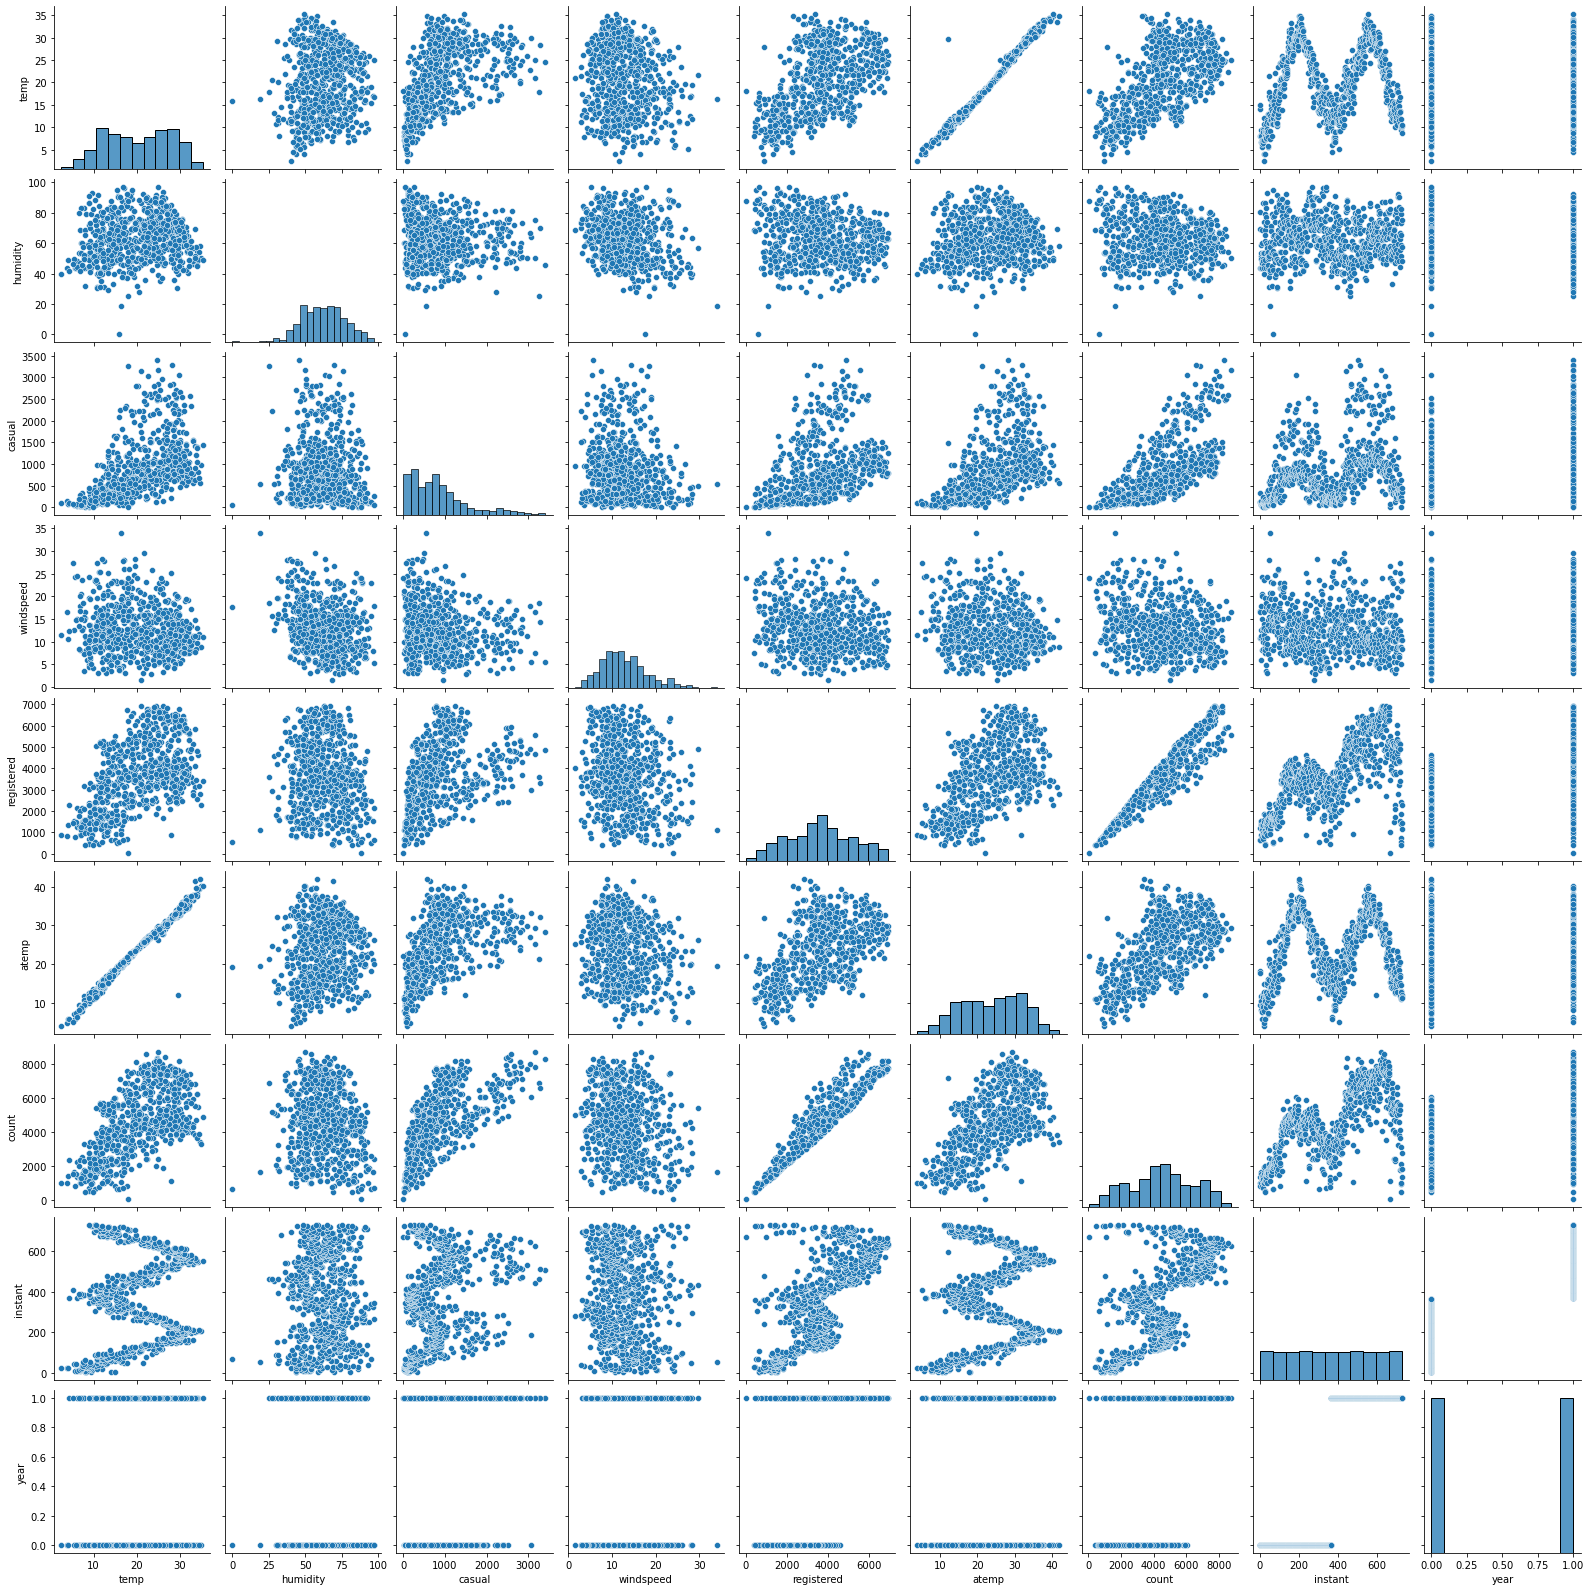

In [933]:
sns.pairplot(biking, vars=["temp", "humidity",'casual','windspeed','registered','atemp','count','instant','year'])
plt.show()

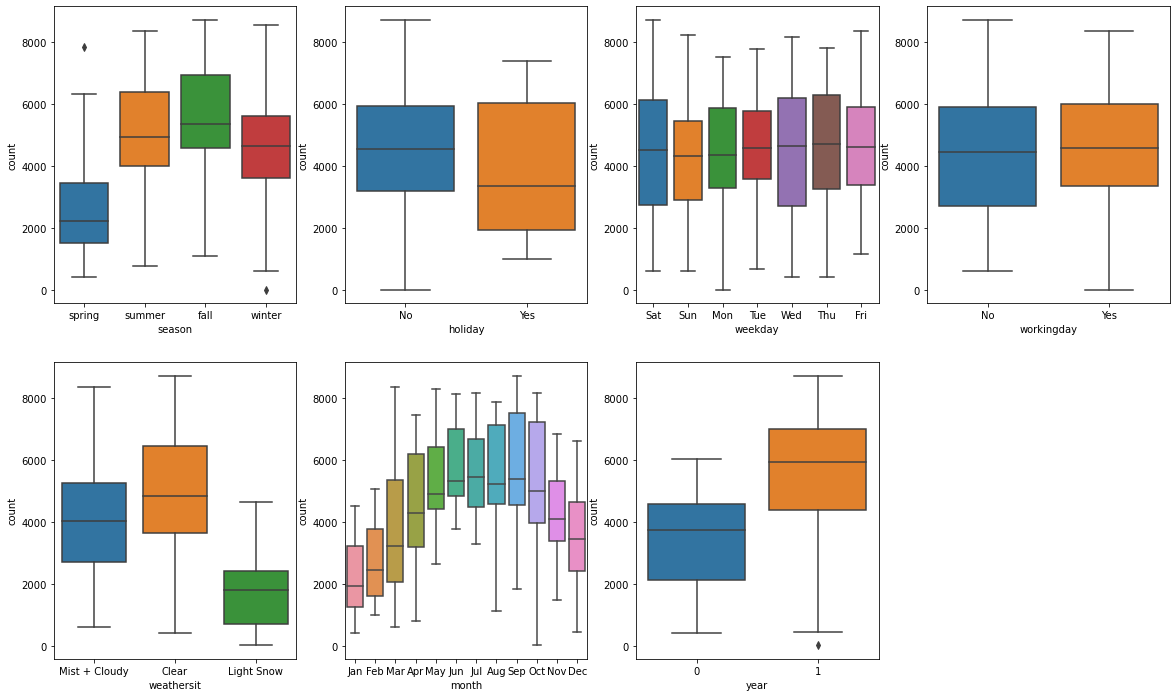

In [934]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'count', data = biking)
plt.subplot(2,4,2)
sns.boxplot(x = 'holiday', y = 'count', data = biking)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'count', data = biking)
plt.subplot(2,4,4)
sns.boxplot(x = 'workingday', y = 'count', data = biking)
plt.subplot(2,4,5)
sns.boxplot(x = 'weathersit', y = 'count', data = biking)
plt.subplot(2,4,6)
sns.boxplot(x = 'month', y = 'count', data = biking)
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'count', data = biking)
plt.show()

### Univariate analysis
#### Season status
This analysis focus on finding the relation between season and count of bike rentals.

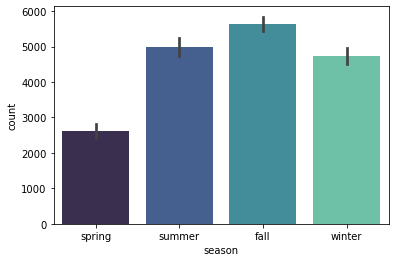

In [935]:
sns.barplot('season','count',data=biking,palette="mako",)
plt.show()

Bike rentals in `spring` is the less than other seasons.

#### Weathersit status
This analysis focus on finding the relation between weathersit and count of bike rentals.

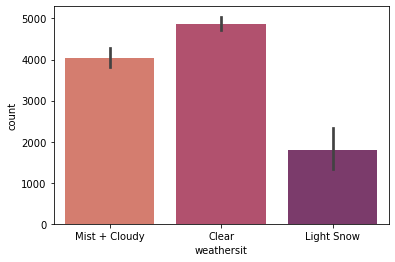

In [936]:
sns.barplot('weathersit','count',palette="flare",data=biking)
plt.show()

Bike rentals are more in Clear, Few clouds, Partly cloudy.

#### Months in year status
This analysis focus on finding the relation between months in year 2018, 2019 and count of bike rentals.

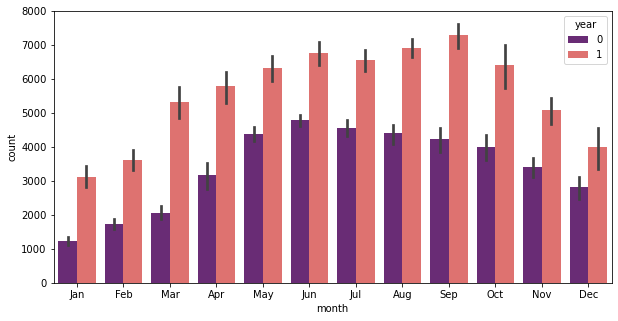

In [937]:
plt.figure(figsize=(10,5))
sns.barplot('month','count',hue='year',data=biking,palette='magma')
plt.show()

Bike rentals in 2019 is more than 2018.

#### Temperature status
This analysis focus on finding the relation between temperature and count of bike rentals.



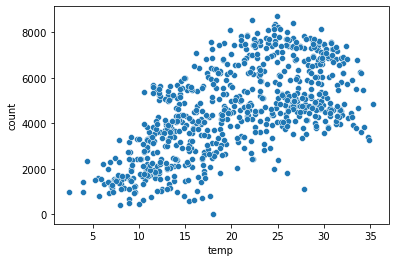

In [938]:
sns.scatterplot(x='temp',y='count' ,data=biking)
plt.show()

From the observed the temperature range from 15 to 30 Celsius is more suitable for Biking activity (more bike rentals).

#### Humidity status
This analysis focus on finding the relation between humidity and count of bike rentals.

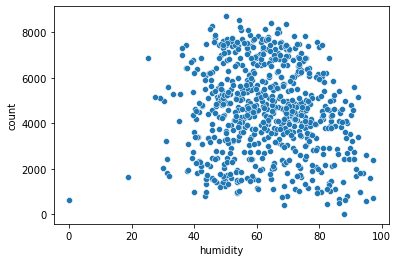

In [939]:
sns.scatterplot(x='humidity', y='count',data=biking)
plt.show()

The more humidity the more is bike rentals.

### Heatmap
#### Use the heatmap to see correlation between variables

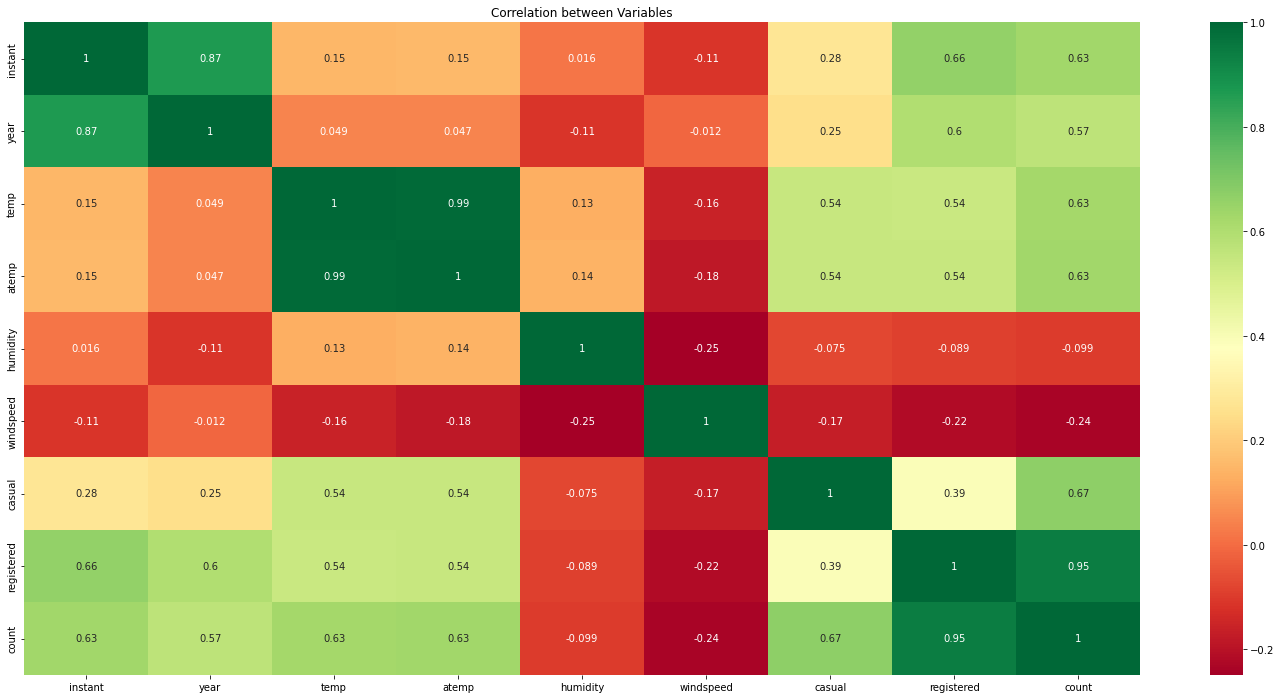

In [940]:
plt.figure(figsize=(25, 12))
sns.heatmap(biking.corr(), cmap='RdYlGn', annot = True)
plt.title("Correlation between Variables")
plt.show()

From the heatmap above can see instant, year, temp, atemp, casual, registered variables are correlated to 'count' variable

    There are some other variables are also most correlated.
    Based on the plots above we can identify the variables can be turn out for building the model.
    From this we can Linear Regression Model.



#### From the dataset there are some variables that are not required and should be dropped: instant, dteday, casual, registered, atemp, holiday, weekday, workingday.

In [941]:
biking.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,spring,0,Jan,No,Sat,No,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,No,Sun,No,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,No,Mon,Yes,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,No,Tue,Yes,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,No,Wed,Yes,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [942]:
biking=biking.drop(['instant','dteday','casual', 'registered','atemp', 'holiday', 'weekday', 'workingday'], axis=1)
biking.head()

,season,year,month,weathersit,temp,humidity,windspeed,count
0,spring,0,Jan,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,Clear,9.305237,43.6957,12.522300,1600


## Step 3: Data Preparation

- At step 2, we were converted many columns from '0' and '1' values to 'Yes' or 'No' for human friendly to visualise the data. 

- But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them back to 1s and 0s, where 1 is a 'Yes' and 0 is a 'No'.

In [943]:
# Display the biking dataframe after convert back

biking.head()

,season,year,month,weathersit,temp,humidity,windspeed,count
0,spring,0,Jan,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,Clear,9.305237,43.6957,12.522300,1600


### Dummy Variables

The variable levels as per below:
 - `season` has 4 levels. 
 - `month` has 12 levels. 
 - `weathersit` has 3 levels (There're 4 categories variable, but from the dataset there're only 3). 
We need to convert these levels into integer as well. 

For this, we will use `dummy variables`.

In [944]:
# Get the dummy variables for season, month, weekday, weathersit and drop the first column.
season_d = pd.get_dummies(biking['season'], drop_first = True)
month_d = pd.get_dummies(biking['month'], drop_first = True)
weathersit_d = pd.get_dummies(biking['weathersit'], drop_first = True)

In [945]:
# Check 1 sample what the dataset 'season' looks like
season_d.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [946]:
# Add the results to the original biking dataframe

biking=pd.concat([month_d,weathersit_d,season_d,biking],axis=1)

In [947]:
# Now let's see the head of our dataframe.

biking.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,summer,winter,season,year,month,weathersit,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,0,0,spring,0,Jan,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,0,0,spring,0,Jan,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,0,0,spring,0,Jan,Clear,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,0,0,spring,0,Jan,Clear,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,0,0,spring,0,Jan,Clear,9.305237,43.6957,12.522300,1600


In [948]:
# Drop 'season', 'month', 'weathersit' as we have created the dummies for it

biking.drop(['season', 'month', 'weathersit'], axis = 1, inplace = True)

In [949]:
biking.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,Light Snow,Mist + Cloudy,spring,summer,winter,year,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,0,1,1,0,0,0,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,0,1,1,0,0,0,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,9.305237,43.6957,12.522300,1600


In [950]:
biking.shape

(730, 21)

#### Use the heatmap to recheck the correlation between variables

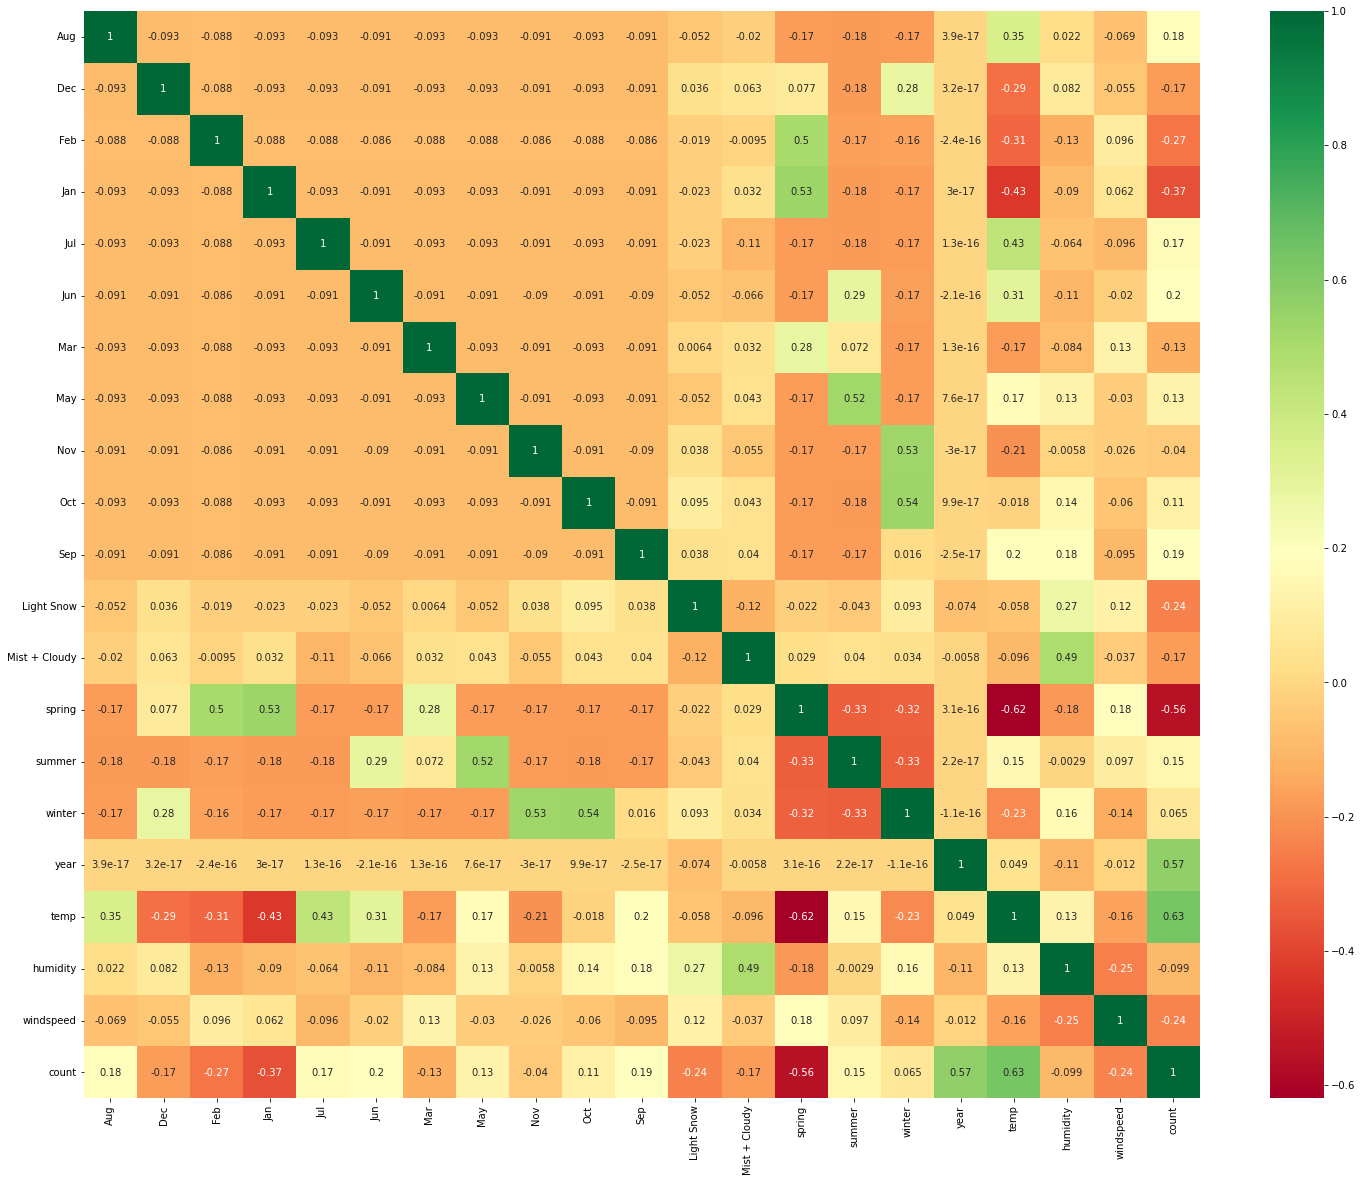

In [951]:
plt.figure(figsize=(25, 20))
sns.heatmap(biking.corr(), cmap='RdYlGn', annot = True)
plt.show()

## Step 4: Splitting the Data into Training and Testing Sets

The first step for regression is performing a train-test split.

In [952]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
biking_train, biking_test = train_test_split(biking, train_size = 0.7, test_size = 0.3, random_state = 100)

In [953]:
#Display the rows and columns after split

print(biking_train.shape)
print(biking_test.shape)

(510, 21)
(219, 21)


### Rescaling the Features 

It is important to have all the variables on the same scale for the model to be easily interpretable. So we will use standardization or normalization so that the units of the coefficients obtained are all on the same scale. There are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [954]:
from sklearn.preprocessing import MinMaxScaler

In [955]:
scaler = MinMaxScaler()

In [956]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','humidity','windspeed','count']

biking_train[num_vars] = scaler.fit_transform(biking_train[num_vars])

In [957]:
biking_train.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,Light Snow,Mist + Cloudy,spring,summer,winter,year,temp,humidity,windspeed,count
653,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,1,0.509887,0.575354,0.300794,0.864243
576,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0.815169,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,...,0,1,1,0,0,1,0.442393,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0.245101,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0.395666,0.504508,0.188475,0.482973


In [958]:
biking_train.describe()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,Light Snow,Mist + Cloudy,spring,summer,winter,year,temp,humidity,windspeed,count
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,...,0.029412,0.343137,0.243137,0.245098,0.24902,0.507843,0.537262,0.650369,0.320768,0.513620
std,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,...,0.169124,0.475223,0.429398,0.430568,0.43287,0.500429,0.225844,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.540519,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.00000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


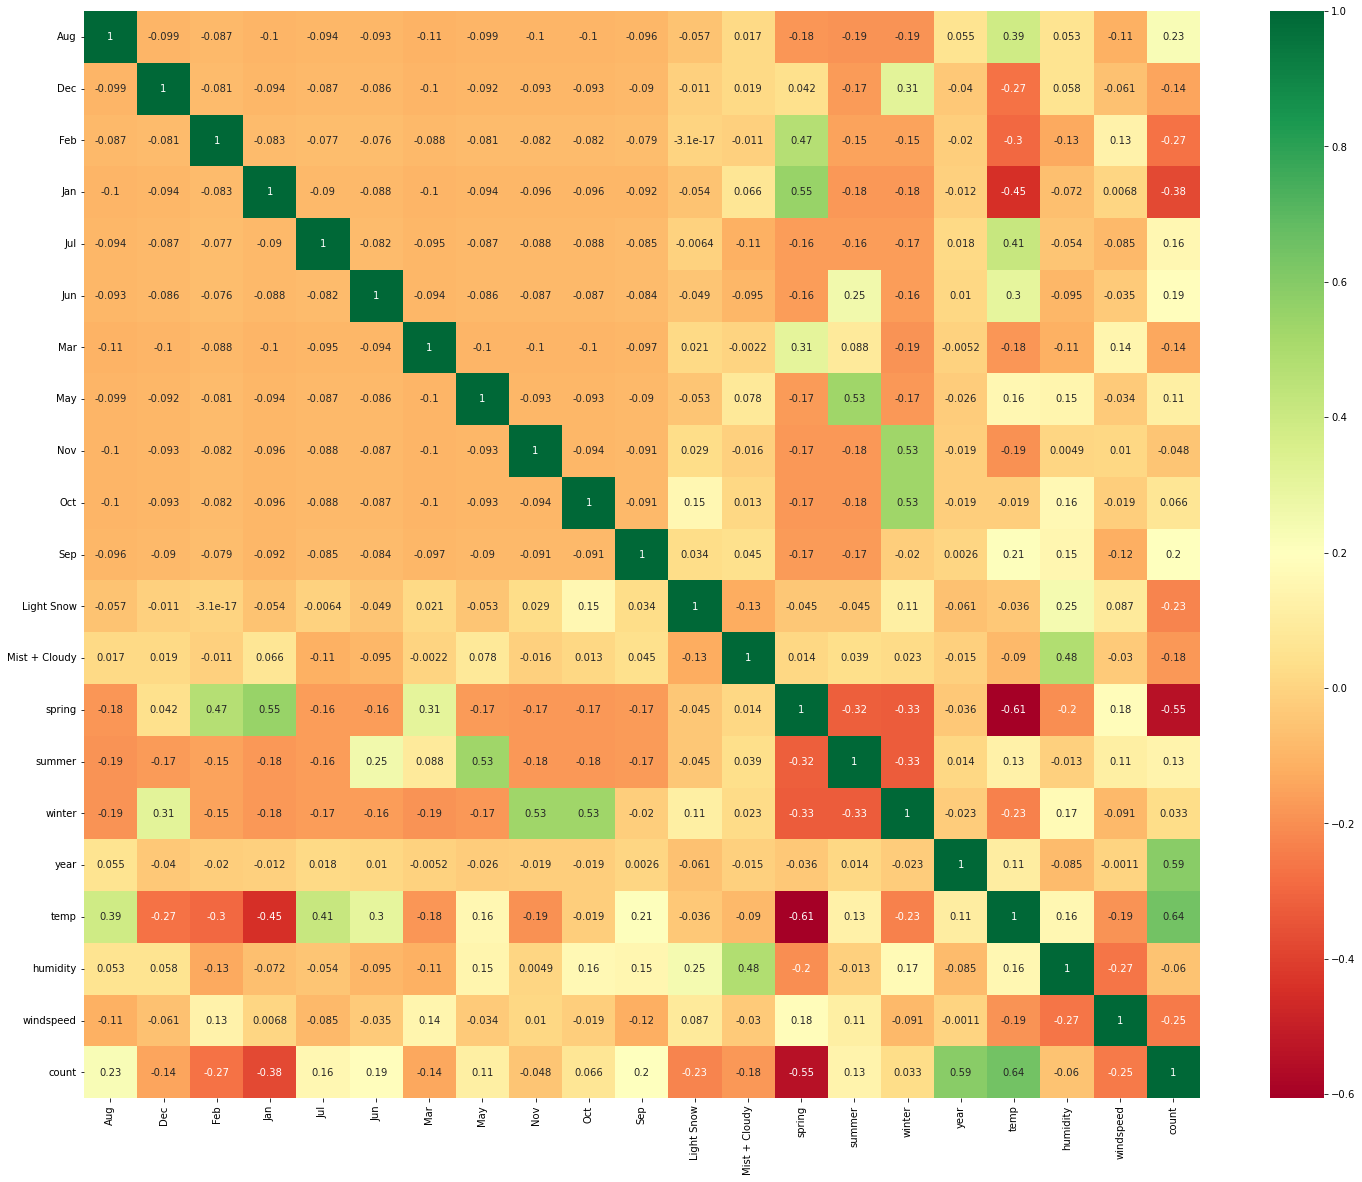

In [959]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 20))
sns.heatmap(biking_train.corr(), annot = True, cmap="RdYlGn")
plt.show()

From the heatmap we can see `temp`, `year` is correlated to the `count` variable. On the other hand, `spring` is also correlated to the `count` .

### Dividing into X and Y sets for the model building

In [960]:
y_train = biking_train.pop('count')
X_train = biking_train

## Step 5: Building a linear model

Fit a regression line through the training data using `statsmodels`. To explicitly fit a constant using `sm.add_constant(X)`.

In [961]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['temp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [962]:
# Check the parameters obtained

lr.params

const    0.169798
temp     0.639952
dtype: float64

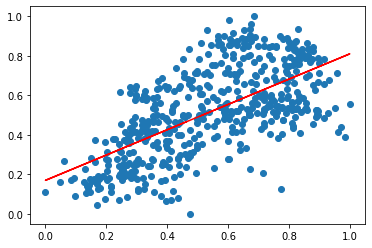

In [963]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.169798 + 0.639952*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [964]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Wed, 15 Jun 2022   Prob (F-statistic):           5.80e-61
Time:                        16:12:58   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.0

### Adding another variable

The R-squared value obtained is `0.414`. Since we have so many variables, we can clearly do better than this. So let's go ahead and add the second most highly correlated variable, i.e. `year`.

In [965]:
# Assign all the feature variables to X
X_train_lm = X_train[['temp', 'year']]

In [966]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const    0.079628
temp     0.583559
year     0.237213
dtype: float64

In [967]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     564.9
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          9.25e-130
Time:                        16:12:58   Log-Likelihood:                 337.38
No. Observations:                 510   AIC:                            -668.8
Df Residuals:                     507   BIC:                            -656.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0796      0.015      5.331      0.0

We have clearly improved the model as the value of adjusted R-squared as its value has gone up to `0.690` from `0.414`.
Let's go ahead and add another variable, `humidity`.

In [968]:
# Assign all the feature variables to X
X_train_lm = X_train[['temp', 'year','humidity']]

In [969]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const       0.182734
temp        0.601795
year        0.232137
humidity   -0.169635
dtype: float64

In [970]:
# Print the summary of the model

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     397.3
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.45e-132
Time:                        16:12:58   Log-Likelihood:                 347.22
No. Observations:                 510   AIC:                            -686.4
Df Residuals:                     506   BIC:                            -669.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1827      0.027      6.676      0.0

We have improved the adjusted R-squared again. Now let's go ahead and add all the feature variables.

### Adding all the variables to the model

In [971]:
# Check all the columns of the dataframe

biking.columns

Index(['Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct',
       'Sep', 'Light Snow', 'Mist + Cloudy', 'spring', 'summer', 'winter',
       'year', 'temp', 'humidity', 'windspeed', 'count'],
      dtype='object')

In [972]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const            0.331543
Aug              0.021831
Dec             -0.045684
Feb             -0.035816
Jan             -0.062120
Jul             -0.037131
Jun              0.001430
Mar              0.006918
May              0.028268
Nov             -0.052402
Oct              0.001131
Sep              0.082548
Light Snow      -0.243360
Mist + Cloudy   -0.054951
spring          -0.048859
summer           0.039103
winter           0.110813
year             0.231486
temp             0.449646
humidity        -0.167302
windspeed       -0.188471
dtype: float64

In [973]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     131.8
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          2.39e-182
Time:                        16:12:58   Log-Likelihood:                 511.54
No. Observations:                 510   AIC:                            -981.1
Df Residuals:                     489   BIC:                            -892.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3315      0.044      7.499

Looking at the p-values, it looks like some of the variables aren't really significant.

We could simply drop the variable with the highest, non-significant p value. But a better way would be to supplement this with the VIF information. 

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [974]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [975]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,humidity,37.12
17,temp,36.33
13,spring,11.63
15,winter,11.62
14,summer,6.63
9,Oct,6.34
8,Nov,5.93
0,Aug,5.77
4,Jul,5.17
3,Jan,5.13


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

### Dropping the Variable and Updating the Model
#### Dropping `humidity`
As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

As you might have noticed, the variable `humidity` has a significantly high VIF (`37.12`). Hence, this variable isn't of much use and should be dropped.

In [976]:
X = X_train.drop('humidity', 1,)

# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     133.1
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.47e-179
Time:                        16:12:59   Log-Likelihood:                 502.21
No. Observations:                 510   AIC:                            -964.4
Df Residuals:                     490   BIC:                            -879.7
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2651      0.042      6.297

In [977]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,temp,26.05
15,winter,11.35
13,spring,11.06
9,Oct,5.86
0,Aug,5.53
14,summer,5.44
8,Nov,5.33
4,Jul,5.09
18,windspeed,4.89
3,Jan,4.47


#### Dropping `temp`

As you might have noticed, the variable `temp` has a significantly high VIF (`26.05`). Hence, this variable isn't of much use and should be dropped.

In [978]:
X = X.drop(['temp'], 1)

In [979]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     119.0
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          6.40e-166
Time:                        16:12:59   Log-Likelihood:                 466.76
No. Observations:                 510   AIC:                            -895.5
Df Residuals:                     491   BIC:                            -815.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4931      0.035     14.141

In [980]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,winter,11.11
13,spring,10.32
9,Oct,5.03
8,Nov,5.00
17,windspeed,4.76
3,Jan,4.46
1,Dec,3.96
14,summer,3.69
2,Feb,3.61
6,Mar,3.05


#### Dropping `winter`

As you might have noticed, the variable `winter` has a significantly high VIF (`11.11`). Hence, this variable isn't of much use and should be dropped.

In [981]:
X = X.drop(['winter'], 1)

In [982]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     123.9
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          2.19e-165
Time:                        16:12:59   Log-Likelihood:                 462.93
No. Observations:                 510   AIC:                            -889.9
Df Residuals:                     492   BIC:                            -813.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5242      0.033     15.802

In [983]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,spring,7.42
16,windspeed,4.74
3,Jan,3.56
14,summer,3.50
2,Feb,2.94
6,Mar,2.56
15,year,1.99
7,May,1.81
12,Mist + Cloudy,1.61
9,Oct,1.45


#### Dropping `spring`

As you might have noticed, the variable `spring` has a significantly high VIF (`7.42`). Hence, this variable isn't of much use and should be dropped.

In [984]:
X = X.drop(['spring'], 1)

In [985]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     123.4
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.02e-160
Time:                        16:12:59   Log-Likelihood:                 449.18
No. Observations:                 510   AIC:                            -864.4
Df Residuals:                     493   BIC:                            -792.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4521      0.031     14.604

In [986]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,windspeed,4.33
13,summer,2.89
14,year,1.99
7,May,1.73
12,Mist + Cloudy,1.61
3,Jan,1.44
6,Mar,1.44
2,Feb,1.43
9,Oct,1.42
8,Nov,1.40


#### Dropping `Nov`
After dropping `humidity`, `temp`, `winter`, `spring` decreased the VIF such that it is now under 5. But from the summary, we can still see one variable a high p-value. `Nov` for instance, has a p-value of `0.771`. We should drop this variable as well.

In [987]:
X = X.drop(['Nov'], 1)

In [988]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     131.9
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          9.11e-162
Time:                        16:12:59   Log-Likelihood:                 449.13
No. Observations:                 510   AIC:                            -866.3
Df Residuals:                     494   BIC:                            -798.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4595      0.018     26.122

In [989]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,windspeed,3.50
12,summer,2.65
13,year,1.91
7,May,1.73
11,Mist + Cloudy,1.55
6,Mar,1.35
3,Jan,1.32
2,Feb,1.31
8,Oct,1.31
5,Jun,1.29


Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

## Step 6: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [990]:
y_train_price = lr_3.predict(X_train_lm)

Text(0.5, 0, 'Errors')

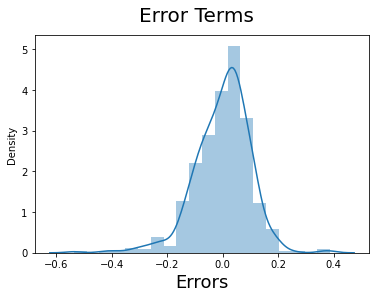

In [991]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 7: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

#### Applying the scaling on the test sets

In [992]:
num_vars = ['temp','humidity','windspeed','count']

biking_test[num_vars] = scaler.transform(biking_test[num_vars])

In [993]:
biking_test.describe()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,Light Snow,Mist + Cloudy,spring,summer,winter,year,temp,humidity,windspeed,count
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,...,0.027397,0.319635,0.255708,0.264840,0.232877,0.479452,0.558941,0.638508,0.313350,0.520592
std,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,...,0.163612,0.467403,0.437258,0.442259,0.423633,0.500722,0.233698,0.148974,0.159947,0.218435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.558691,0.627737,0.299459,0.524275
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300


#### Dividing into X_test and y_test

In [994]:
y_test = biking_test.pop('count')
X_test = biking_test

In [995]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

In [996]:
X_test_m4.head()

,const,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,...,Sep,Light Snow,Mist + Cloudy,spring,summer,winter,year,temp,humidity,windspeed
184,1.0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0.831783,0.657364,0.084219
535,1.0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0.901354,0.610133,0.153728
299,1.0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0.511964,0.837699,0.334206
221,1.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.881625,0.437098,0.339570
152,1.0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0.817246,0.314298,0.537414


In [997]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4

X_test_m4 = X_test_m4.drop(['spring', 'humidity', 'temp', 'winter', 'Nov'], 1)

In [998]:
# Making predictions using the fourth model

y_pred_m4 = lr_3.predict(X_test_m4)

## Step 8: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

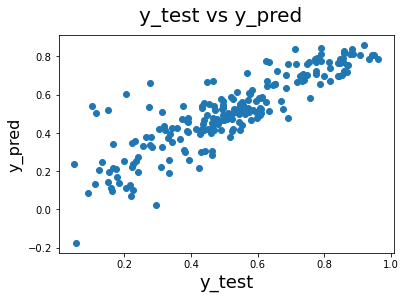

In [999]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [1000]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m4)

0.7547543275041426

# Final result
#### We can see that the equation of our best fitted line is:

$ count = 0.4595+ 0.1441  \times  Aug - 0.0696  \times  Dec - 0.1771 \times Feb - 0.2414 \times Jan + 0.1152 \times Jul + 0.1186 \times Jun - 0.0635 \times Mar + 0.0774 \times May + 0.1058 \times Oct + 0.1761 \times Sep - 0.2905 \times 'Light Snow' - 0.0829 \times 'Mist + Cloudy' + 0.0408 \times summer + 0.2482 \times year - 0.1902 \times windspeed $

#### The R-squared score: 0.7547543275041426
